# Comparison of methodologies: experiments

The notebook follows the same order as the experiments in the pdf.

* Experiment 1: sample size
* Experiment 2: Divergence in distributions
* Experiment 3: Sample size + divergence in distributions

Actually the experiments are done for an alpha value of 10 and a TAN structure, which can be changed below. 

The files "uplaod_files","Metrics.py", "fit_hierarchical.py", "utils-py", "predict.py" and "VB.py" are used in all 3 experiments.
The file "diverge_distribution.py" is only used in the second and third experiment.


In [1]:
file = "diabetes" # adult
mod = "tan" # "naive"
alpha = 10. # 1

In [2]:
import pandas as pd
import numpy as np
import os
from hashlib import md5
import cmdstanpy as ps
from scipy.stats import norm,dirichlet, multinomial, beta, binom
import copy
import matplotlib.pyplot as plt
import bnlearn as bn
import pgmpy as pgm
from pgmpy.models import BayesianNetwork
from cmdstanpy import CmdStanModel
from VB import VB_stan_hierMD
from pgmpy.factors.discrete import TabularCPD 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx
import pylab as plt
import networkx
import matplotlib
import matplotlib.pyplot
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [3]:
# Import functions defined in other ".py"
from utilities import Metrics
from utilities import upload_files
from utilities import utils
from utilities.Metrics import calculate_metrics
from utilities.upload_files import load_compute_edges,remove_constant_columns
from utilities.utils import hier_bayes, define_dag, Laplace,equalFreqBins, compute_theta_MD_mean
from utilities.fit_hierarchical import model,convert2CPD, map_categories,cpds_multi,fit_hierarchical, fit,cpds_all
from utilities.predict import predict
from utilities.diverge_distribution import original_estimates,diverge_sample

# Load data and define model

In [4]:
def upload_file(file, mod, alpha):
    method = 'multi-domain'
    group = 'gender'
    if file == "adult":        
        class_s = 'income'
        path = "./Datasets/Adult/"
    elif file == "diabetes":
        class_s = "readmitted"
        path = "./Datasets/dataset_diabetes/"
        
    path += file + ".csv"    
    
    return path, group, class_s, method

In [5]:
path, group, class_s, method = upload_file(file, mod, alpha)

In [6]:
df, edges, features = load_compute_edges(path,class_s,group,mod,nvals= 4, sample = 1)
levelsy = np.unique(df[group])
dag_orig, dag_hier = define_dag(edges,df, group)

# Experiment 1: Diverge samples

In [7]:
#samples = [len(df)]
samples = [20, 60, 120, 240, 500]

before map
after map
start predicting


  0%|          | 0/232 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.5957
Precision: 0.795 
 Recall: 0.652 
 F1 Score: 0.716 

before map
after map
start predicting


  0%|          | 0/223 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.566
Precision: 0.77 
 Recall: 0.636 
 F1 Score: 0.696 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/106 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.566
Precision: 0.766 
 Recall: 0.641 
 F1 Score: 0.698 



  0%|          | 0/223 [00:00<?, ?it/s]

Accuracy of the model: 0.5362
Precision: 0.762 
 Recall: 0.592 
 F1 Score: 0.667 



  0%|          | 0/223 [00:00<?, ?it/s]

Accuracy of the model: 0.5447
Precision: 0.785 
 Recall: 0.576 
 F1 Score: 0.665 

before map
after map
start predicting


  0%|          | 0/232 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7702
Precision: 0.79 
 Recall: 0.962 
 F1 Score: 0.868 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7319
Precision: 0.784 
 Recall: 0.908 
 F1 Score: 0.841 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/106 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7574
Precision: 0.793 
 Recall: 0.935 
 F1 Score: 0.858 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.6723
Precision: 0.78 
 Recall: 0.81 
 F1 Score: 0.795 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.634
Precision: 0.782 
 Recall: 0.739 
 F1 Score: 0.76 

before map
after map
start predicting


  0%|          | 0/232 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.783
Precision: 0.804 
 Recall: 0.957 
 F1 Score: 0.873 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7532
Precision: 0.789 
 Recall: 0.935 
 F1 Score: 0.856 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/106 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7787
Precision: 0.8 
 Recall: 0.957 
 F1 Score: 0.871 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.7489
Precision: 0.799 
 Recall: 0.908 
 F1 Score: 0.85 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.7234
Precision: 0.79 
 Recall: 0.88 
 F1 Score: 0.833 

before map
after map
start predicting


  0%|          | 0/232 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7745
Precision: 0.794 
 Recall: 0.962 
 F1 Score: 0.87 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7447
Precision: 0.782 
 Recall: 0.935 
 F1 Score: 0.851 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/106 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7702
Precision: 0.795 
 Recall: 0.951 
 F1 Score: 0.866 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.7404
Precision: 0.789 
 Recall: 0.913 
 F1 Score: 0.846 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.7362
Precision: 0.785 
 Recall: 0.913 
 F1 Score: 0.844 

before map
after map
start predicting


  0%|          | 0/232 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7574
Precision: 0.785 
 Recall: 0.951 
 F1 Score: 0.86 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7702
Precision: 0.785 
 Recall: 0.973 
 F1 Score: 0.869 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/106 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7447
Precision: 0.779 
 Recall: 0.94 
 F1 Score: 0.852 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.7447
Precision: 0.779 
 Recall: 0.94 
 F1 Score: 0.852 



  0%|          | 0/227 [00:00<?, ?it/s]

Accuracy of the model: 0.7787
Precision: 0.792 
 Recall: 0.973 
 F1 Score: 0.873 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6851
Precision: 0.779 
 Recall: 0.822 
 F1 Score: 0.8 

before map
after map
start predicting


  0%|          | 0/224 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6213
Precision: 0.749 
 Recall: 0.761 
 F1 Score: 0.755 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/101 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6766
Precision: 0.78 
 Recall: 0.806 
 F1 Score: 0.792 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.5489
Precision: 0.757 
 Recall: 0.606 
 F1 Score: 0.673 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.6213
Precision: 0.757 
 Recall: 0.744 
 F1 Score: 0.751 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6766
Precision: 0.763 
 Recall: 0.839 
 F1 Score: 0.799 

before map
after map
start predicting


  0%|          | 0/224 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6043
Precision: 0.746 
 Recall: 0.733 
 F1 Score: 0.739 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/101 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6681
Precision: 0.755 
 Recall: 0.839 
 F1 Score: 0.795 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.5745
Precision: 0.763 
 Recall: 0.644 
 F1 Score: 0.699 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.6085
Precision: 0.765 
 Recall: 0.706 
 F1 Score: 0.734 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6596
Precision: 0.763 
 Recall: 0.806 
 F1 Score: 0.784 

before map
after map
start predicting


  0%|          | 0/224 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6213
Precision: 0.754 
 Recall: 0.75 
 F1 Score: 0.752 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/101 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6766
Precision: 0.783 
 Recall: 0.8 
 F1 Score: 0.791 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.6298
Precision: 0.778 
 Recall: 0.722 
 F1 Score: 0.749 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.634
Precision: 0.75 
 Recall: 0.783 
 F1 Score: 0.766 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7106
Precision: 0.764 
 Recall: 0.9 
 F1 Score: 0.827 

before map
after map
start predicting


  0%|          | 0/224 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6851
Precision: 0.757 
 Recall: 0.867 
 F1 Score: 0.808 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/101 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7106
Precision: 0.769 
 Recall: 0.889 
 F1 Score: 0.825 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.6723
Precision: 0.767 
 Recall: 0.822 
 F1 Score: 0.794 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.7021
Precision: 0.772 
 Recall: 0.867 
 F1 Score: 0.817 

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6766
Precision: 0.763 
 Recall: 0.839 
 F1 Score: 0.799 

before map
after map
start predicting


  0%|          | 0/224 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7106
Precision: 0.764 
 Recall: 0.9 
 F1 Score: 0.827 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/101 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.6936
Precision: 0.767 
 Recall: 0.861 
 F1 Score: 0.812 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.6979
Precision: 0.761 
 Recall: 0.883 
 F1 Score: 0.817 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.7447
Precision: 0.778 
 Recall: 0.933 
 F1 Score: 0.848 



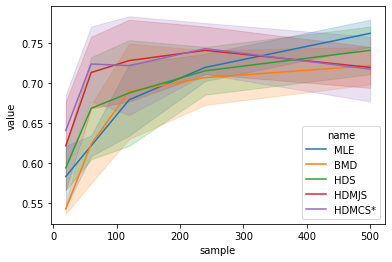

In [8]:
accs_new = []
accs_single_dom = []
accs_multi_dom = []
accs_tan = []
accs_mle = []



for i in range(2):
    df, edges, features = load_compute_edges(path,class_s,group,mod,nvals= 4, sample = 1)

    df = df.sample(frac=1)
    len_train = int(len(df)*0.9)
    Xy_train, Xy_test = df.iloc[:len_train,:], df.iloc[len_train:,:]
    df_Male = Xy_train[Xy_train['gender'] == 'Male']
    df_Female = Xy_train[Xy_train['gender'] == 'Female']
    proportion_male = len(df_Male)/len(Xy_train)
    proportion_female = 1 - proportion_male

    new_accs = []
    hier_single_accs=[]
    hier_multi_accs=[]
    non_hier_tan_accs = []
    mle_accs = []



    for sample in samples:
        test_sample = Xy_test.copy()
        df_male_new = df_Male.iloc[:int(sample*proportion_male),:]
        df_female_new = df_Female.iloc[:int(sample*proportion_female),:]
        df_new = pd.concat([df_male_new,df_female_new])
        train_sample, edges, features = remove_constant_columns(df_new,mod, group, class_s)
        test_sample = test_sample[train_sample.columns]
        data = pd.concat([train_sample,test_sample])
        dict_map = map_categories(data)
        dag_orig, dag_hier = define_dag(edges,data, group)
        x_train, x_test = train_sample.loc[:,features], test_sample.loc[:,features]
        y_train, y_test = train_sample.loc[:,class_s], test_sample.loc[:,class_s]

         # New

        models_new = model(dag_hier,dag_orig,data,alpha, class_s, x_train, method = 'new')
        y_true, y_pred,y_probs  = predict(x_test,models_new,dict_map,class_s, group , lev = None, method = "new")
        acc, precision, recall, f1_score = calculate_metrics(y_true,y_probs, y_pred, file, mod, alpha,lev = None)
        new_accs.append(acc)

        # Single domain

        models_single = model(dag_hier,dag_orig,data,alpha,class_s, x_train, method = 'single-data')
        y_true, y_pred,y_probs  = predict(x_test,models_single,dict_map,class_s, group ,lev = None, method = "single-data")
        acc, precision, recall, f1_score = calculate_metrics(y_true,y_probs, y_pred, file, mod, alpha,lev = None)
        hier_single_accs.append(acc)


       # Multi-domain
        models_hier = model(dag_hier,dag_orig,data, alpha,class_s,x_train, method = 'multi-data')


        ys_true = []
        pred = []
        ys_probs = []
        for lev in models_hier.keys():

            y_true, y_pred,y_probs  = predict(x_test, models_hier[lev],dict_map, class_s, group , lev, method = 'multi-data')
            ys_true.extend(y_true) 
            pred.extend(list(y_pred)) 
            ys_probs.extend(y_probs)

        # Calculate global metrics

        acc, precision, recall, f1_score = calculate_metrics(ys_true,ys_probs, pred, file, mod, alpha,lev = None)

        hier_multi_accs.append(acc)

        # Normal Tan

        ### Add map with train and test to avoid unseen cases
        for i,j in enumerate(x_train.columns):
            x_train[j] = x_train[j].map(dict_map[i])
        for i,j in enumerate(x_test.columns):
            x_test[j] = x_test[j].map(dict_map[i])
        # Concatenate all train and test to define the dict with possible values of the variables
        data_copy = pd.concat([x_test,x_train])   

        dict_values = {}
        for i in data_copy.columns:
            dict_values[i] = list(np.unique(data_copy.loc[:,i]))

        non_hier_tan = BayesianNetwork(ebunch=dag_orig.edges())    
        non_hier_tan.fit(data=x_train, estimator=BayesianEstimator,state_names = dict_values, prior_type='BDeu', equivalent_sample_size=alpha)

        y_test = x_test[class_s]
        x_test.drop([class_s, group], axis=1, inplace=True, errors = 'ignore')
        y_probs = non_hier_tan.predict(x_test)
        y_pred = y_probs.values
        acc, precision, recall, f1_score = calculate_metrics(y_test,y_probs, y_pred,file, mod, alpha,lev = None)
        non_hier_tan_accs.append(acc)


        # MLE
        mle_nonhier = BayesianNetwork(ebunch=dag_orig.edges())
        mle_nonhier.fit(data=x_train, estimator=MaximumLikelihoodEstimator,state_names = dict_values)
        mle_nonhier = Laplace(mle_nonhier,0.01)
        y_probs = mle_nonhier.predict(x_test)
        y_pred = y_probs.values
        acc, precision, recall, f1_score = calculate_metrics(y_test,y_probs, y_pred, file, mod, alpha,lev = None)
        mle_accs.append(acc)
  

    accs_new.append(np.array(new_accs))
    accs_single_dom.append(np.array(hier_single_accs))
    accs_multi_dom.append(np.array(hier_multi_accs))
    accs_tan.append(np.array(non_hier_tan_accs))
    accs_mle.append(np.array(mle_accs))


MLE = pd.DataFrame(np.array(accs_mle), columns = samples)
BMD = pd.DataFrame(np.array(accs_tan), columns = samples)
HDS = pd.DataFrame(np.array(accs_single_dom), columns = samples)
HDMJS = pd.DataFrame(np.array(accs_multi_dom), columns = samples)
HDMCS = pd.DataFrame(np.array(accs_new), columns = samples)

MLE = MLE.melt(value_vars=MLE.columns,value_name='value', var_name = "sample")
MLE["name"] = "MLE"
BMD = BMD.melt(value_vars=BMD.columns,value_name='value', var_name = "sample")
BMD["name"] = "BMD"
HDS = HDS.melt(value_vars=HDS.columns,value_name='value', var_name = "sample")
HDS["name"] = "HDS"
HDMJS = HDMJS.melt(value_vars=HDMJS.columns,value_name='value', var_name = "sample")
HDMJS["name"] = "HDMJS"
HDMCS = HDMCS.melt(value_vars=HDMCS.columns,value_name='value', var_name = "sample")
HDMCS["name"] = "HDMCS*"
Results = pd.concat([MLE,BMD,HDS,HDMJS,HDMCS]).reset_index(drop = True)

fig = sns.lineplot(x="sample", y="value",hue = "name",  data= Results)
figure = fig.get_figure()
figure.savefig("./images/seaborn_comparion_alpha_" +mod+ "_" + str(alpha)+"-"+file+".png")

# Experiment 2: Diverge distribution

In [9]:
deltas = [0,0.2,0.4,0.6,0.8,1]

In [10]:
diverged_model, diverged_model_F, diverged_model_M, x_train_F, x_train_M, len_M, len_F, edges, features = original_estimates(1, path, class_s, group, mod, alpha)

accs_new = []
accs_single_dom = []
accs_multi_dom = []
accs_tan = []
accs_mle = []

for delta in deltas:
    #generate the synthethic dataset
    model_male, model_female = diverge_sample(diverged_model_M,diverged_model_F, diverged_model,delta, class_s, group)
    inference_M = BayesianModelSampling(model_male)
    inference_F = BayesianModelSampling(model_female)
    new_df_M = inference_M.forward_sample(size=len_M, seed = 42)
    new_df_M['gender'] = 'Male'
    new_df_F = inference_F.forward_sample(size=len_F, seed = 42)
    new_df_F['gender'] = 'Female'
    df = pd.concat([new_df_M,new_df_F]).reset_index(drop = True)
    df = df.sample(frac = 1, random_state = 42)
  
    # We have now our synthetic dataset
    
    features = list(df.columns)
    len_df = len(df)    

    len_train = int(len(df)*0.9)
    Xy_train, Xy_test = df.iloc[:len_train,:], df.iloc[len_train:,:]
    df_Male = Xy_train[Xy_train['gender'] == 'Male']
    df_Female = Xy_train[Xy_train['gender'] == 'Female']
    proportion_male = len(df_Male)/len(Xy_train)
    proportion_female = 1 - proportion_male
    test_sample = Xy_test.copy()
    df_male_new = df_Male.iloc[:int(len_df*proportion_male),:]
    df_female_new = df_Female.iloc[:int(len_df*proportion_female),:]
    df_new = pd.concat([df_male_new,df_female_new])
    df_new = df_new.sample(frac = 1)
    train_sample, edges, features = remove_constant_columns(df_new,mod, group,class_s)
    test_sample = test_sample[train_sample.columns]
    data = pd.concat([train_sample,test_sample])
    dict_map = map_categories(data)
    dag_orig, dag_hier = define_dag(edges,data, group)
    x_train, x_test = train_sample.loc[:,features], test_sample.loc[:,features]
    y_train, y_test = train_sample.loc[:,class_s], test_sample.loc[:,class_s]

    
    #New
    models_new = model(dag_hier,dag_orig,data, alpha,class_s, x_train, method = 'new')

    y_true, y_pred,y_probs  = predict(x_test,models_new,dict_map,class_s, group , lev = None, method = "new")
    acc, precision, recall, f1_score = calculate_metrics(y_true,y_probs, y_pred, file, mod, alpha,lev = None)
    accs_new.append(acc)

    # Single domain

    models_single = model(dag_hier,dag_orig,data,alpha,class_s, x_train, method = 'single-data')
    y_true, y_pred,y_probs  = predict(x_test,models_single,dict_map,class_s, group ,lev = None, method = "single-data")
    acc, precision, recall, f1_score = calculate_metrics(y_true,y_probs, y_pred, file, mod, alpha,lev = None)
    accs_single_dom.append(acc)

    # Multi-domain

    models_hier = model(dag_hier,dag_orig,data,alpha,class_s, x_train, method = 'multi-data')


    ys_true = []
    pred = []
    ys_probs = []
    for lev in models_hier.keys():

        y_true, y_pred,y_probs  = predict(x_test, models_hier[lev],dict_map, class_s, group , lev, method = 'multi-data')
        ys_true.extend(y_true) 
        pred.extend(list(y_pred)) 
        ys_probs.extend(y_probs)

    # Calculate global metrics

    acc, precision, recall, f1_score = calculate_metrics(ys_true,ys_probs, pred, file, mod, alpha,lev = None)
    accs_multi_dom.append(acc)

    # Normal Tan
    ### Añadir map con x_train y x_test
    for i,j in enumerate(x_train.columns):
        x_train[j] = x_train[j].map(dict_map[i])
    for i,j in enumerate(x_test.columns):
        x_test[j] = x_test[j].map(dict_map[i])
    # Concatenate all train and test to define the dict with possible values of the variables
    data_copy = pd.concat([x_test,x_train])   

    dict_values = {}
    for i in data_copy.columns:
        dict_values[i] = list(np.unique(data_copy.loc[:,i]))

    non_hier_tan = BayesianNetwork(ebunch=dag_orig.edges())    
    non_hier_tan.fit(data=x_train, estimator=BayesianEstimator,state_names = dict_values, prior_type='BDeu', equivalent_sample_size=alpha)

    x_test1 = x_test.copy()
    y_test = x_test[class_s]
    x_test.drop([class_s, group], axis=1, inplace=True, errors = 'ignore')
    y_probs = non_hier_tan.predict(x_test)
    y_pred = y_probs.values

    acc, precision, recall, f1_score = calculate_metrics(y_test,y_probs, y_pred,file, mod, alpha,lev = None)

    accs_tan.append(acc)

    # MLE
    mle_nonhier = BayesianNetwork(ebunch=dag_orig.edges())
    mle_nonhier.fit(data=x_train, estimator=MaximumLikelihoodEstimator,state_names = dict_values)
    mle_nonhier = Laplace(mle_nonhier,0.01)
    y_probs = mle_nonhier.predict(x_test)
    y_pred = y_probs.values
    acc, precision, recall, f1_score = calculate_metrics(y_test,y_probs, y_pred,file, mod, alpha,lev = None)

    accs_mle.append(acc)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

before map
after map
start predicting


  0%|          | 0/227 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7532
Precision: 0.753 
 Recall: 1.0 
 F1 Score: 0.859 

before map
after map
start predicting


  0%|          | 0/224 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7532
Precision: 0.753 
 Recall: 1.0 
 F1 Score: 0.859 

before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/101 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7532
Precision: 0.753 
 Recall: 1.0 
 F1 Score: 0.859 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.7532
Precision: 0.753 
 Recall: 1.0 
 F1 Score: 0.859 



  0%|          | 0/224 [00:00<?, ?it/s]

Accuracy of the model: 0.7532
Precision: 0.753 
 Recall: 1.0 
 F1 Score: 0.859 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

before map
after map
start predicting


  0%|          | 0/233 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8
Precision: 0.801 
 Recall: 0.977 
 F1 Score: 0.88 

before map
after map
start predicting


  0%|          | 0/232 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.766
Precision: 0.775 
 Recall: 0.972 
 F1 Score: 0.862 

before map
after map
start predicting


  0%|          | 0/131 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/102 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8
Precision: 0.804 
 Recall: 0.972 
 F1 Score: 0.88 



  0%|          | 0/232 [00:00<?, ?it/s]

Accuracy of the model: 0.766
Precision: 0.775 
 Recall: 0.972 
 F1 Score: 0.862 



  0%|          | 0/232 [00:00<?, ?it/s]

Accuracy of the model: 0.7532
Precision: 0.753 
 Recall: 1.0 
 F1 Score: 0.859 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

before map
after map
start predicting


  0%|          | 0/230 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8809
Precision: 0.886 
 Recall: 0.966 
 F1 Score: 0.924 

before map
after map
start predicting


  0%|          | 0/230 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8383
Precision: 0.849 
 Recall: 0.955 
 F1 Score: 0.899 

before map
after map
start predicting


  0%|          | 0/128 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/102 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8766
Precision: 0.881 
 Recall: 0.966 
 F1 Score: 0.922 



  0%|          | 0/230 [00:00<?, ?it/s]

Accuracy of the model: 0.8426
Precision: 0.85 
 Recall: 0.96 
 F1 Score: 0.902 



  0%|          | 0/230 [00:00<?, ?it/s]

Accuracy of the model: 0.8085
Precision: 0.806 
 Recall: 0.983 
 F1 Score: 0.885 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

before map
after map
start predicting


  0%|          | 0/225 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9277
Precision: 0.96 
 Recall: 0.944 
 F1 Score: 0.952 

before map
after map
start predicting


  0%|          | 0/225 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8511
Precision: 0.894 
 Recall: 0.91 
 F1 Score: 0.902 

before map
after map
start predicting


  0%|          | 0/123 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/102 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9277
Precision: 0.96 
 Recall: 0.944 
 F1 Score: 0.952 



  0%|          | 0/225 [00:00<?, ?it/s]

Accuracy of the model: 0.8511
Precision: 0.894 
 Recall: 0.91 
 F1 Score: 0.902 



  0%|          | 0/225 [00:00<?, ?it/s]

Accuracy of the model: 0.8383
Precision: 0.86 
 Recall: 0.938 
 F1 Score: 0.897 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

before map
after map
start predicting


  0%|          | 0/176 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9872
Precision: 0.989 
 Recall: 0.994 
 F1 Score: 0.992 

before map
after map
start predicting


  0%|          | 0/176 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9574
Precision: 0.961 
 Recall: 0.983 
 F1 Score: 0.972 

before map
after map
start predicting


  0%|          | 0/74 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/102 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9872
Precision: 0.989 
 Recall: 0.994 
 F1 Score: 0.992 



  0%|          | 0/176 [00:00<?, ?it/s]

Accuracy of the model: 0.9574
Precision: 0.961 
 Recall: 0.983 
 F1 Score: 0.972 



  0%|          | 0/176 [00:00<?, ?it/s]

Accuracy of the model: 0.8851
Precision: 0.891 
 Recall: 0.966 
 F1 Score: 0.927 



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

before map
after map
start predicting


  0%|          | 0/113 [00:00<?, ?it/s]

predicted
Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 

before map
after map
start predicting


  0%|          | 0/113 [00:00<?, ?it/s]

predicted
Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 

before map
after map
start predicting


  0%|          | 0/15 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/98 [00:00<?, ?it/s]

predicted
Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 



  0%|          | 0/113 [00:00<?, ?it/s]

Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 



  0%|          | 0/113 [00:00<?, ?it/s]

Accuracy of the model: 0.983
Precision: 0.978 
 Recall: 1.0 
 F1 Score: 0.989 



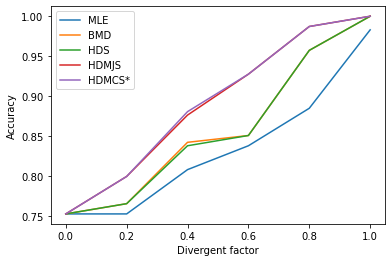

In [11]:
plt.plot(deltas, accs_mle , label = "MLE")
plt.plot(deltas, accs_tan, label =  "BMD")
plt.plot(deltas, accs_single_dom, label = "HDS")
plt.plot(deltas, accs_multi_dom, label = "HDMJS")
plt.plot(deltas, accs_new, label = "HDMCS*")


plt.xlabel("Divergent factor")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("./images/"  + file +"/2comparion_diverge_alpha_" +mod+ "_" + str(alpha)+"-"+file+".png")
plt.show()

# Experiment 3: Diverge sample and distribution

In [12]:
samples = [120, 260, 500]
deltas = [0,0.2,0.4,0.6,0.8,1]

sample 120
delta 0


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/448 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7292
Precision: 0.774 
 Recall: 0.914 
 F1 Score: 0.838 

before map
after map
start predicting


  0%|          | 0/434 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7335
Precision: 0.785 
 Recall: 0.9 
 F1 Score: 0.838 

HDMJS
before map
after map
start predicting


  0%|          | 0/235 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/213 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7335
Precision: 0.778 
 Recall: 0.914 
 F1 Score: 0.84 



  0%|          | 0/434 [00:00<?, ?it/s]

Accuracy of the model: 0.71
Precision: 0.783 
 Recall: 0.861 
 F1 Score: 0.82 



  0%|          | 0/434 [00:00<?, ?it/s]

Accuracy of the model: 0.7377
Precision: 0.779 
 Recall: 0.919 
 F1 Score: 0.843 

delta 0.2


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/459 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7591
Precision: 0.787 
 Recall: 0.942 
 F1 Score: 0.857 

before map
after map
start predicting


  0%|          | 0/454 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7313
Precision: 0.777 
 Recall: 0.911 
 F1 Score: 0.839 

HDMJS
before map
after map
start predicting


  0%|          | 0/238 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/221 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7569
Precision: 0.789 
 Recall: 0.933 
 F1 Score: 0.855 



  0%|          | 0/454 [00:00<?, ?it/s]

Accuracy of the model: 0.7164
Precision: 0.78 
 Recall: 0.878 
 F1 Score: 0.826 



  0%|          | 0/454 [00:00<?, ?it/s]

Accuracy of the model: 0.7015
Precision: 0.775 
 Recall: 0.861 
 F1 Score: 0.816 

delta 0.4


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/451 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8188
Precision: 0.83 
 Recall: 0.961 
 F1 Score: 0.891 

before map
after map
start predicting


  0%|          | 0/451 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7633
Precision: 0.807 
 Recall: 0.908 
 F1 Score: 0.855 

HDMJS
before map
after map
start predicting


  0%|          | 0/229 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/222 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8273
Precision: 0.839 
 Recall: 0.958 
 F1 Score: 0.895 



  0%|          | 0/451 [00:00<?, ?it/s]

Accuracy of the model: 0.7505
Precision: 0.809 
 Recall: 0.883 
 F1 Score: 0.845 



  0%|          | 0/451 [00:00<?, ?it/s]

Accuracy of the model: 0.7377
Precision: 0.803 
 Recall: 0.872 
 F1 Score: 0.836 

delta 0.6


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/424 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9019
Precision: 0.909 
 Recall: 0.969 
 F1 Score: 0.938 

before map
after map
start predicting


  0%|          | 0/424 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8166
Precision: 0.883 
 Recall: 0.878 
 F1 Score: 0.88 

HDMJS
before map
after map
start predicting


  0%|          | 0/202 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/222 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8913
Precision: 0.901 
 Recall: 0.964 
 F1 Score: 0.932 



  0%|          | 0/424 [00:00<?, ?it/s]

Accuracy of the model: 0.8188
Precision: 0.89 
 Recall: 0.872 
 F1 Score: 0.881 



  0%|          | 0/424 [00:00<?, ?it/s]

Accuracy of the model: 0.8102
Precision: 0.861 
 Recall: 0.897 
 F1 Score: 0.879 

delta 0.8


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/347 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9659
Precision: 0.965 
 Recall: 0.992 
 F1 Score: 0.978 

before map
after map
start predicting


  0%|          | 0/347 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8934
Precision: 0.926 
 Recall: 0.936 
 F1 Score: 0.931 

HDMJS
before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/221 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9659
Precision: 0.965 
 Recall: 0.992 
 F1 Score: 0.978 



  0%|          | 0/347 [00:00<?, ?it/s]

Accuracy of the model: 0.9041
Precision: 0.941 
 Recall: 0.933 
 F1 Score: 0.937 



  0%|          | 0/347 [00:00<?, ?it/s]

Accuracy of the model: 0.8934
Precision: 0.912 
 Recall: 0.953 
 F1 Score: 0.932 

delta 1


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/220 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9936
Precision: 0.992 
 Recall: 1.0 
 F1 Score: 0.996 

before map
after map
start predicting


  0%|          | 0/220 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9915
Precision: 0.989 
 Recall: 1.0 
 F1 Score: 0.994 

HDMJS
before map
after map
start predicting


  0%|          | 0/20 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/200 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9893
Precision: 0.989 
 Recall: 0.997 
 F1 Score: 0.993 



  0%|          | 0/220 [00:00<?, ?it/s]

Accuracy of the model: 0.9936
Precision: 0.992 
 Recall: 1.0 
 F1 Score: 0.996 



  0%|          | 0/220 [00:00<?, ?it/s]

Accuracy of the model: 0.9723
Precision: 0.965 
 Recall: 1.0 
 F1 Score: 0.982 



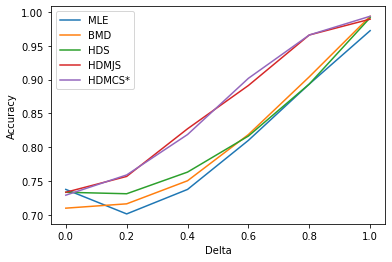

sample 260
delta 0


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/448 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7249
Precision: 0.77 
 Recall: 0.914 
 F1 Score: 0.836 

before map
after map
start predicting


  0%|          | 0/434 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.742
Precision: 0.767 
 Recall: 0.953 
 F1 Score: 0.85 

HDMJS
before map
after map
start predicting


  0%|          | 0/235 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/213 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.71
Precision: 0.765 
 Recall: 0.897 
 F1 Score: 0.826 



  0%|          | 0/434 [00:00<?, ?it/s]

Accuracy of the model: 0.7271
Precision: 0.772 
 Recall: 0.914 
 F1 Score: 0.837 



  0%|          | 0/434 [00:00<?, ?it/s]

Accuracy of the model: 0.7463
Precision: 0.773 
 Recall: 0.947 
 F1 Score: 0.851 

delta 0.2


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/459 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7932
Precision: 0.807 
 Recall: 0.961 
 F1 Score: 0.877 

before map
after map
start predicting


  0%|          | 0/454 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7633
Precision: 0.793 
 Recall: 0.936 
 F1 Score: 0.859 

HDMJS
before map
after map
start predicting


  0%|          | 0/238 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/221 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7783
Precision: 0.803 
 Recall: 0.942 
 F1 Score: 0.867 



  0%|          | 0/454 [00:00<?, ?it/s]

Accuracy of the model: 0.7249
Precision: 0.785 
 Recall: 0.883 
 F1 Score: 0.831 



  0%|          | 0/454 [00:00<?, ?it/s]

Accuracy of the model: 0.7399
Precision: 0.782 
 Recall: 0.917 
 F1 Score: 0.844 

delta 0.4


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/451 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8294
Precision: 0.848 
 Recall: 0.947 
 F1 Score: 0.895 

before map
after map
start predicting


  0%|          | 0/451 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8038
Precision: 0.828 
 Recall: 0.939 
 F1 Score: 0.88 

HDMJS
before map
after map
start predicting


  0%|          | 0/229 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/222 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.838
Precision: 0.853 
 Recall: 0.953 
 F1 Score: 0.9 



  0%|          | 0/451 [00:00<?, ?it/s]

Accuracy of the model: 0.8081
Precision: 0.833 
 Recall: 0.939 
 F1 Score: 0.883 



  0%|          | 0/451 [00:00<?, ?it/s]

Accuracy of the model: 0.7783
Precision: 0.811 
 Recall: 0.928 
 F1 Score: 0.865 

delta 0.6


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/424 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8998
Precision: 0.915 
 Recall: 0.958 
 F1 Score: 0.936 

before map
after map
start predicting


  0%|          | 0/424 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8294
Precision: 0.88 
 Recall: 0.9 
 F1 Score: 0.89 

HDMJS
before map
after map
start predicting


  0%|          | 0/202 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/222 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9041
Precision: 0.925 
 Recall: 0.953 
 F1 Score: 0.938 



  0%|          | 0/424 [00:00<?, ?it/s]

Accuracy of the model: 0.8252
Precision: 0.88 
 Recall: 0.894 
 F1 Score: 0.887 



  0%|          | 0/424 [00:00<?, ?it/s]

Accuracy of the model: 0.8252
Precision: 0.858 
 Recall: 0.925 
 F1 Score: 0.89 

delta 0.8


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/347 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.968
Precision: 0.973 
 Recall: 0.986 
 F1 Score: 0.979 

before map
after map
start predicting


  0%|          | 0/347 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9147
Precision: 0.932 
 Recall: 0.958 
 F1 Score: 0.945 

HDMJS
before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/221 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.968
Precision: 0.973 
 Recall: 0.986 
 F1 Score: 0.979 



  0%|          | 0/347 [00:00<?, ?it/s]

Accuracy of the model: 0.9254
Precision: 0.94 
 Recall: 0.964 
 F1 Score: 0.952 



  0%|          | 0/347 [00:00<?, ?it/s]

Accuracy of the model: 0.8849
Precision: 0.894 
 Recall: 0.964 
 F1 Score: 0.928 

delta 1


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/220 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9957
Precision: 0.994 
 Recall: 1.0 
 F1 Score: 0.997 

before map
after map
start predicting


  0%|          | 0/220 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9872
Precision: 0.984 
 Recall: 1.0 
 F1 Score: 0.992 

HDMJS
before map
after map
start predicting


  0%|          | 0/20 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/200 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9957
Precision: 0.994 
 Recall: 1.0 
 F1 Score: 0.997 



  0%|          | 0/220 [00:00<?, ?it/s]

Accuracy of the model: 0.9936
Precision: 0.992 
 Recall: 1.0 
 F1 Score: 0.996 



  0%|          | 0/220 [00:00<?, ?it/s]

Accuracy of the model: 0.9488
Precision: 0.938 
 Recall: 1.0 
 F1 Score: 0.968 



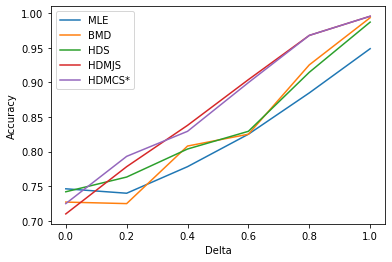

sample 500
delta 0


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/448 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7505
Precision: 0.781 
 Recall: 0.939 
 F1 Score: 0.852 

before map
after map
start predicting


  0%|          | 0/434 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7335
Precision: 0.769 
 Recall: 0.933 
 F1 Score: 0.843 

HDMJS
before map
after map
start predicting


  0%|          | 0/235 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/213 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7484
Precision: 0.781 
 Recall: 0.933 
 F1 Score: 0.851 



  0%|          | 0/434 [00:00<?, ?it/s]

Accuracy of the model: 0.7249
Precision: 0.774 
 Recall: 0.906 
 F1 Score: 0.835 



  0%|          | 0/434 [00:00<?, ?it/s]

Accuracy of the model: 0.7612
Precision: 0.773 
 Recall: 0.975 
 F1 Score: 0.862 

delta 0.2


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/459 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7804
Precision: 0.814 
 Recall: 0.925 
 F1 Score: 0.866 

before map
after map
start predicting


  0%|          | 0/454 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7761
Precision: 0.799 
 Recall: 0.947 
 F1 Score: 0.867 

HDMJS
before map
after map
start predicting


  0%|          | 0/238 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/221 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.7783
Precision: 0.814 
 Recall: 0.922 
 F1 Score: 0.865 



  0%|          | 0/454 [00:00<?, ?it/s]

Accuracy of the model: 0.7633
Precision: 0.797 
 Recall: 0.928 
 F1 Score: 0.858 



  0%|          | 0/454 [00:00<?, ?it/s]

Accuracy of the model: 0.7548
Precision: 0.774 
 Recall: 0.961 
 F1 Score: 0.857 

delta 0.4


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/451 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8529
Precision: 0.88 
 Recall: 0.936 
 F1 Score: 0.907 

before map
after map
start predicting


  0%|          | 0/451 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8038
Precision: 0.837 
 Recall: 0.925 
 F1 Score: 0.879 

HDMJS
before map
after map
start predicting


  0%|          | 0/229 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/222 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8593
Precision: 0.887 
 Recall: 0.936 
 F1 Score: 0.911 



  0%|          | 0/451 [00:00<?, ?it/s]

Accuracy of the model: 0.7974
Precision: 0.839 
 Recall: 0.911 
 F1 Score: 0.874 



  0%|          | 0/451 [00:00<?, ?it/s]

Accuracy of the model: 0.7953
Precision: 0.81 
 Recall: 0.958 
 F1 Score: 0.878 

delta 0.6


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/424 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9168
Precision: 0.947 
 Recall: 0.944 
 F1 Score: 0.946 

before map
after map
start predicting


  0%|          | 0/424 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.8358
Precision: 0.886 
 Recall: 0.903 
 F1 Score: 0.894 

HDMJS
before map
after map
start predicting


  0%|          | 0/202 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/222 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9147
Precision: 0.944 
 Recall: 0.944 
 F1 Score: 0.944 



  0%|          | 0/424 [00:00<?, ?it/s]

Accuracy of the model: 0.8358
Precision: 0.892 
 Recall: 0.894 
 F1 Score: 0.893 



  0%|          | 0/424 [00:00<?, ?it/s]

Accuracy of the model: 0.8294
Precision: 0.852 
 Recall: 0.942 
 F1 Score: 0.894 

delta 0.8


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/347 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9787
Precision: 0.981 
 Recall: 0.992 
 F1 Score: 0.986 

before map
after map
start predicting


  0%|          | 0/347 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9232
Precision: 0.955 
 Recall: 0.944 
 F1 Score: 0.95 

HDMJS
before map
after map
start predicting


  0%|          | 0/126 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/221 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9765
Precision: 0.981 
 Recall: 0.989 
 F1 Score: 0.985 



  0%|          | 0/347 [00:00<?, ?it/s]

Accuracy of the model: 0.9275
Precision: 0.953 
 Recall: 0.953 
 F1 Score: 0.953 



  0%|          | 0/347 [00:00<?, ?it/s]

Accuracy of the model: 0.9041
Precision: 0.913 
 Recall: 0.967 
 F1 Score: 0.939 

delta 1


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

HDMCS*
before map
after map
start predicting


  0%|          | 0/220 [00:00<?, ?it/s]

predicted
Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 

before map
after map
start predicting


  0%|          | 0/220 [00:00<?, ?it/s]

predicted
Accuracy of the model: 0.9936
Precision: 0.992 
 Recall: 1.0 
 F1 Score: 0.996 

HDMJS
before map
after map
start predicting


  0%|          | 0/20 [00:00<?, ?it/s]

predicted
before map
after map
start predicting


  0%|          | 0/200 [00:00<?, ?it/s]

predicted
Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 



  0%|          | 0/220 [00:00<?, ?it/s]

Accuracy of the model: 1.0
Precision: 1.0 
 Recall: 1.0 
 F1 Score: 1.0 



  0%|          | 0/220 [00:00<?, ?it/s]

Accuracy of the model: 0.9701
Precision: 0.963 
 Recall: 1.0 
 F1 Score: 0.981 



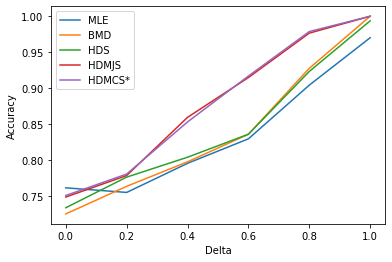

In [15]:
for sample in samples:
    print("sample", sample)
    accs_new = []
    accs_single_dom = []
    accs_multi_dom = []
    accs_tan = []
    accs_mle = []
    
    diverged_model, diverged_model_F, diverged_model_M, x_train_F, x_train_M, len_M, len_F, edges, features = original_estimates(1, path, class_s, group, mod, alpha)
    for delta in deltas:
        print("delta",delta)
        model_male, model_female = diverge_sample(diverged_model_M,diverged_model_F, diverged_model,delta, class_s, group)

        inference_M = BayesianModelSampling(model_male)
        inference_F = BayesianModelSampling(model_female)
        new_df_M = inference_M.forward_sample(size=len_M, seed = 42)
        new_df_M['gender'] = 'Male'
        new_df_F = inference_F.forward_sample(size=len_F, seed = 42)
        new_df_F['gender'] = 'Female'
        df = pd.concat([new_df_M,new_df_F]).reset_index(drop = True)
        df = df.sample(frac = 1,random_state= 42)
        
        # Here we have our synthethic dataset
        features = list(df.columns)
        len_df = len(df)    
        len_train = sample
        Xy_train, Xy_test = df.iloc[:len_train,:], df.iloc[-int(len_df*0.1):,:]

        df_Male = Xy_train[Xy_train['gender'] == 'Male']
        df_Female = Xy_train[Xy_train['gender'] == 'Female']
        proportion_male = len(df_Male)/len(Xy_train)
        proportion_female = 1 - proportion_male
        test_sample = Xy_test.copy()
        df_male_new = df_Male.iloc[:int(len_df*proportion_male),:]
        df_female_new = df_Female.iloc[:int(len_df*proportion_female),:]
        df_new = pd.concat([df_male_new,df_female_new])
        df_new = df_new.sample(frac = 1)
        train_sample, edges, features = remove_constant_columns(df_new,mod, group, class_s)
        test_sample = test_sample[train_sample.columns]
        data = pd.concat([train_sample,test_sample])
        dict_map = map_categories(data)
        dag_orig, dag_hier = define_dag(edges,data, group)
        x_train, x_test = train_sample.loc[:,features], test_sample.loc[:,features]
        y_train, y_test = train_sample.loc[:,class_s], test_sample.loc[:,class_s]

        print("HDMCS*")

         #New
        models_new = model(dag_hier,dag_orig,data, alpha,class_s, x_train, method = 'new')

        y_true, y_pred,y_probs  = predict(x_test,models_new,dict_map,class_s, group , lev = None, method = "new")
        acc, precision, recall, f1_score = calculate_metrics(y_true,y_probs, y_pred, file, mod, alpha,lev = None)
        accs_new.append(acc)

        # Single domain

        models_single = model(dag_hier,dag_orig,data,alpha,class_s, x_train, method = 'single-data')
        y_true, y_pred,y_probs  = predict(x_test,models_single,dict_map,class_s, group ,lev = None, method = "single-data")
        acc, precision, recall, f1_score = calculate_metrics(y_true,y_probs, y_pred, file, mod, alpha,lev = None)
        accs_single_dom.append(acc)

        print("HDMJS")

        # Multi-domain

        models_hier = model(dag_hier,dag_orig,data,alpha,class_s, x_train, method = 'multi-data')


        ys_true = []
        pred = []
        ys_probs = []
        for lev in models_hier.keys():

            y_true, y_pred,y_probs  = predict(x_test, models_hier[lev],dict_map, class_s, group , lev, method = 'multi-data')
            ys_true.extend(y_true) 
            pred.extend(list(y_pred)) 
            ys_probs.extend(y_probs)

        # Calculate global metrics

        acc, precision, recall, f1_score = calculate_metrics(ys_true,ys_probs, pred, file, mod, alpha,lev = None)
        accs_multi_dom.append(acc)


        # Normal Tan
        for i,j in enumerate(x_train.columns):
            x_train[j] = x_train[j].map(dict_map[i])
        for i,j in enumerate(x_test.columns):
            x_test[j] = x_test[j].map(dict_map[i])
        # Concatenate all train and test to define the dict with possible values of the variables
        data_copy = pd.concat([x_test,x_train])   

        dict_values = {}
        for i in data_copy.columns:
            dict_values[i] = list(np.unique(data_copy.loc[:,i]))

        non_hier_tan = BayesianNetwork(ebunch=dag_orig.edges())    
        non_hier_tan.fit(data=x_train, estimator=BayesianEstimator,state_names = dict_values, prior_type='BDeu', equivalent_sample_size=alpha)

        x_test1 = x_test.copy()
        y_test = x_test[class_s]
        x_test.drop([class_s, group], axis=1, inplace=True, errors = 'ignore')
        y_probs = non_hier_tan.predict(x_test)
        y_pred = y_probs.values

        acc, precision, recall, f1_score = calculate_metrics(y_test,y_probs, y_pred,file, mod, alpha,lev = None)

        accs_tan.append(acc)

        # MLE
        mle_nonhier = BayesianNetwork(ebunch=dag_orig.edges())
        mle_nonhier.fit(data=x_train, estimator=MaximumLikelihoodEstimator,state_names = dict_values)
        mle_nonhier = Laplace(mle_nonhier,0.01)
        y_probs = mle_nonhier.predict(x_test)
        y_pred = y_probs.values
        acc, precision, recall, f1_score = calculate_metrics(y_test,y_probs, y_pred,file, mod, alpha,lev = None)

        accs_mle.append(acc)

    plt.plot(deltas, accs_mle, label = "MLE")
    plt.plot(deltas, accs_tan, label = "BMD")
    plt.plot(deltas, accs_single_dom, label = "HDS")
    plt.plot(deltas, accs_multi_dom, label = "HDMJS")
    plt.plot(deltas, accs_new, label = "HDMCS*")
    

    plt.xlabel("Delta")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("./images/"  + file +"/comparion_diverge_alpha_" +mod+ "_" + str(alpha)+"-"+file+str(len_train)+".png")
    plt.show()